In [1]:
import torch

import pylab as plt

from dal_toolbox.datasets import cifar

from dal_toolbox.models.deterministic.resnet import ResNet18
from dal_toolbox.models.variational_inference.resnet import BayesianResNet18
from dal_toolbox.models.variational_inference.trainer import VITrainer
from dal_toolbox.models.utils.lr_scheduler import CosineAnnealingLRLinearWarmup

/home/denis/miniconda3/envs/uncertainty_evaluation/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = ResNet18(10)
print(sum([p.numel() for p in model.parameters()]))
model = BayesianResNet18(10)
print(sum([p.numel() for p in model.parameters()]))

11173962
22338324


In [9]:
from torch.utils.data.sampler import SubsetRandomSampler

train_ds = cifar.build_cifar10('train', ds_path='/tmp')
test_ds = cifar.build_cifar10('test', ds_path='/tmp')

sampler = SubsetRandomSampler(indices=torch.randperm(len(train_ds)))
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32, drop_last=True, sampler=sampler)
test_loader = torch.utils.data.DataLoader(train_ds, batch_size=256, sampler=range(1000))

num_epochs = 200

model = BayesianResNet18(10, prior_sigma=.001)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
lr_scheduler = CosineAnnealingLRLinearWarmup(optimizer, num_epochs=num_epochs, warmup_epochs=10)

trainer = VITrainer(model, optimizer, criterion, lr_scheduler=lr_scheduler, device='cuda', kl_temperature=1000)
train_history = trainer.train(num_epochs, train_loader)
train_history = train_history['train_history']
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot([d['train_nll'] for d in train_history])
plt.subplot(122)
plt.plot([d['train_kl_loss'] for d in train_history])
plt.show()

trainer.evaluate(test_loader)

Files already downloaded and verified
Files already downloaded and verified
Epoch [1] [   0/1562] eta: 0:04:05 lr: 0.0001 loss: 61.1158 (61.1158) nll: 2.3175 (2.3175) kl_loss: 58.7983 (58.7983) acc1: 18.7500 (18.7500) time: 0.1569 data: 0.1300 max mem: 1433
Epoch [1] [ 200/1562] eta: 0:00:44 lr: 0.0001 loss: 60.7217 (60.9491) nll: 2.2851 (2.3320) kl_loss: 58.4360 (58.6170) acc1: 12.5000 (11.1318) time: 0.0320 data: 0.0079 max mem: 1433
Epoch [1] [ 400/1562] eta: 0:00:37 lr: 0.0001 loss: 60.2685 (60.7138) nll: 2.2383 (2.2972) kl_loss: 58.0322 (58.4166) acc1: 15.6250 (12.5623) time: 0.0319 data: 0.0078 max mem: 1433
Epoch [1] [ 600/1562] eta: 0:00:30 lr: 0.0001 loss: 59.7738 (60.4839) nll: 2.1385 (2.2691) kl_loss: 57.6249 (58.2147) acc1: 18.7500 (13.8935) time: 0.0314 data: 0.0071 max mem: 1433
Epoch [1] [ 800/1562] eta: 0:00:24 lr: 0.0001 loss: 59.3575 (60.2570) nll: 2.1329 (2.2460) kl_loss: 57.2120 (58.0110) acc1: 18.7500 (15.0554) time: 0.0309 data: 0.0074 max mem: 1433
Epoch [1] [100

/home/denis/miniconda3/envs/uncertainty_evaluation/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch [11] [ 200/1562] eta: 0:00:43 lr: 0.01 loss: 15.2073 (15.2654) nll: 1.5220 (1.5796) kl_loss: 13.6823 (13.6859) acc1: 43.7500 (43.8277) time: 0.0309 data: 0.0072 max mem: 1433
Epoch [11] [ 400/1562] eta: 0:00:36 lr: 0.01 loss: 15.2672 (15.2757) nll: 1.5710 (1.5869) kl_loss: 13.6947 (13.6888) acc1: 43.7500 (43.5084) time: 0.0320 data: 0.0074 max mem: 1433
Epoch [11] [ 600/1562] eta: 0:00:30 lr: 0.01 loss: 15.2244 (15.2714) nll: 1.5276 (1.5813) kl_loss: 13.6964 (13.6901) acc1: 46.8750 (43.5888) time: 0.0318 data: 0.0075 max mem: 1433
Epoch [11] [ 800/1562] eta: 0:00:24 lr: 0.01 loss: 15.2727 (15.2616) nll: 1.5848 (1.5727) kl_loss: 13.6869 (13.6889) acc1: 43.7500 (43.8358) time: 0.0316 data: 0.0076 max mem: 1433
Epoch [11] [1000/1562] eta: 0:00:17 lr: 0.01 loss: 15.1746 (15.2556) nll: 1.5124 (1.5696) kl_loss: 13.6687 (13.6860) acc1: 46.8750 (43.9592) time: 0.0318 data: 0.0074 max mem: 1433
Epoch [11] [1200/1562] eta: 0:00:11 lr: 0.01 loss: 15.0744 (15.2471) nll: 1.3861 (1.5624) kl_lo

In [6]:
ood_dataset = cifar.build_cifar100('test', '/tmp')
test_loader = torch.utils.data.DataLoader(train_ds, batch_size=256, sampler=range(1000))
ood_loader = torch.utils.data.DataLoader(ood_dataset, batch_size=256, sampler=range(1000))

mc_logits_id = []
for inputs, _ in test_loader:
    mc_logits_id.append(model.forward_sample(inputs.cuda()).cpu())
mc_logits_id = torch.cat(mc_logits_id)
print(mc_logits_id.shape)

mc_logits_ood = []
for inputs, _ in ood_loader:
    mc_logits_ood.append(model.forward_sample(inputs.cuda()).cpu())
mc_logits_ood = torch.cat(mc_logits_ood)
print(mc_logits_ood.shape)


Files already downloaded and verified
torch.Size([1000, 10, 10])
torch.Size([1000, 10, 10])


(array([195.,  99., 127., 145., 132., 124.,  96.,  48.,  22.,  12.]),
 array([1.3674399e-07, 1.8862420e-01, 3.7724829e-01, 5.6587237e-01,
        7.5449640e-01, 9.4312048e-01, 1.1317445e+00, 1.3203686e+00,
        1.5089927e+00, 1.6976168e+00, 1.8862408e+00], dtype=float32),
 [<matplotlib.patches.Polygon at 0x7f4849c672e0>])

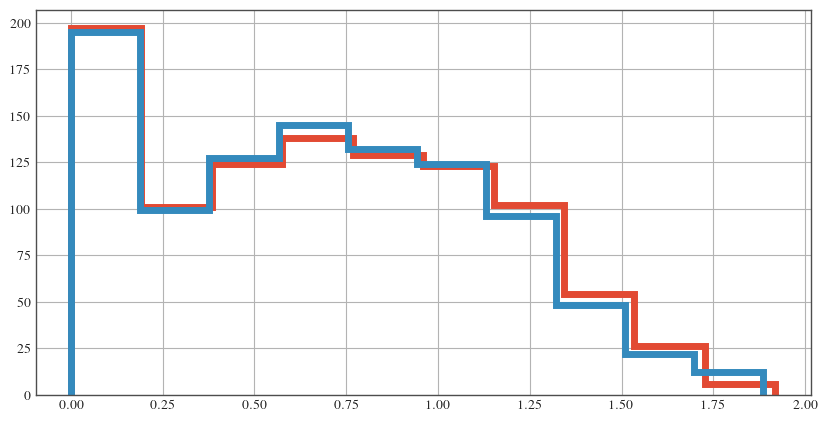

In [8]:
from dal_toolbox.metrics.ood import ensemble_entropy_from_logits
plt.hist(ensemble_entropy_from_logits(mc_logits_id), histtype='step', linewidth=5)
plt.hist(ensemble_entropy_from_logits(mc_logits_ood), histtype='step', linewidth=5)